# SSA for Binary Decision Model

In this document we show the user how to create trajectories with the SSA for the binary decision model under fully connected and mean field assumptions. We first import the package.

In [1]:
include("SSABinaryDecision.jl");
using .BinaryDecSSA;

In [2]:
using Plots, LaTeXStrings

We now need to create a BinDecMod `struct` defining the model that we later wish to simulate.

In [3]:
BD1 = BinDecMod(F = 0.01, J = 2.0, β = 1.0)

BinDecMod
  N: Int64 100
  F: Float64 0.01
  J: Float64 2.0
  α: Float64 0.0
  β: Float64 1.0
  γ: Float64 1.0
  fixedIC: Bool true
  p₀: Float64 0.5


Let's now create an ensemble of 100 simulations for `BD1`.

In [4]:
Ens1 = Ensemble(BD = BD1, e_size = 1000, τₘ = 10^3, Δτ = 1)

Ensemble
  BD: BinDecMod
  e_size: Int64 1000
  τₘ: Int64 1000
  Δτ: Int64 1
  sims: Tuple{Vector{Float64}, Vector{Array{Real, N} where N}}


We can easily then plot the output simulations returned from this ensemble.

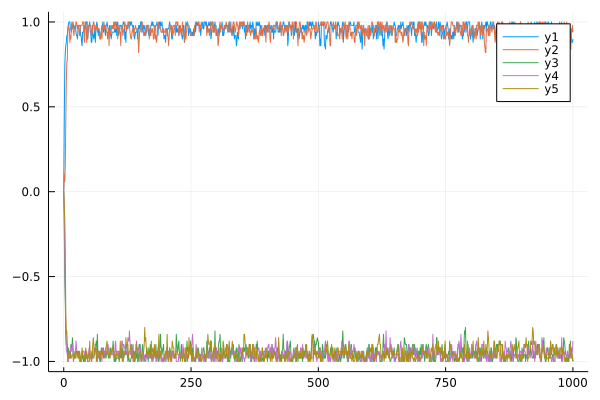

In [5]:
plot(Ens1.sims[1], Ens1.sims[2][1:5])

We can also plot the probability distribution for each number of spins up at each time step.

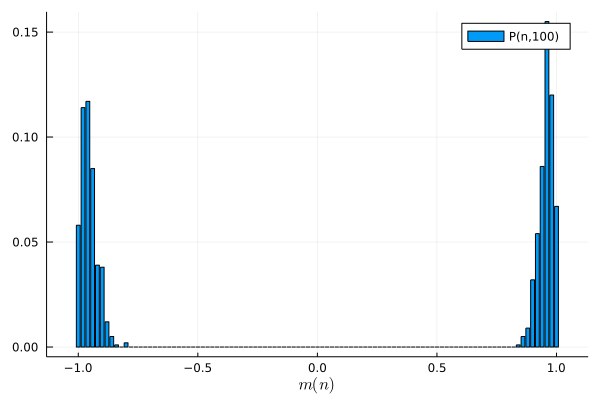

In [6]:
T = 100; # time step 100
pFC = EnsProb(Ens1,T);
bar(pFC, label = join(["P(n," T ")"]))
xlabel!(L"m(n)")

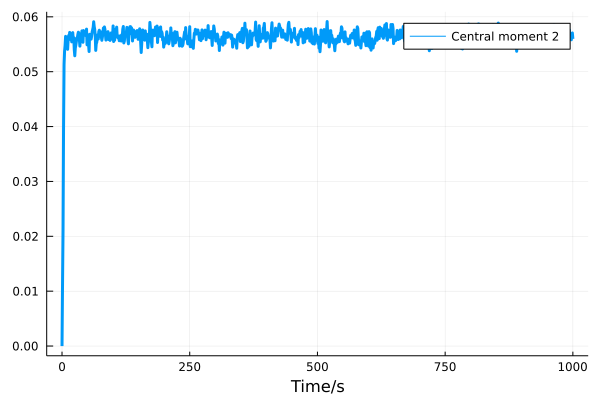

In [8]:
plot(CentralMoments(Ens1,1), label = join(["Central moment ", 2]), lw = 3)
xlabel!("Time/s")